In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('spotify_churn_dataset.csv')
print("Dataset loaded and renamed. Shape:", df.shape)
print(df.head())  # Inspect first few rows

Dataset loaded and renamed. Shape: (8000, 12)
   user_id  gender  age country subscription_type  listening_time  \
0        1  Female   54      CA              Free              26   
1        2   Other   33      DE            Family             141   
2        3    Male   38      AU           Premium             199   
3        4  Female   22      CA           Student              36   
4        5   Other   29      US            Family             250   

   songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                    23       0.20     Desktop                     31   
1                    62       0.34         Web                      0   
2                    38       0.04      Mobile                      0   
3                     2       0.31      Mobile                      0   
4                    57       0.36      Mobile                      0   

   offline_listening  is_churned  
0                  0           1  
1                  1          

In [3]:
print("Dataset loaded. Shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset loaded. Shape: (8000, 12)
Columns: ['user_id', 'gender', 'age', 'country', 'subscription_type', 'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type', 'ads_listened_per_week', 'offline_listening', 'is_churned']


In [6]:
# Drop unnecessary column
# df = df.drop(columns=['user_id'])

# Handle missing values: Drop rows with NaN
df = df.dropna()

# Encode categorical variables (one-hot encoding)
categorical_cols = ['gender', 'country', 'subscription_type', 'device_type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

from sklearn.preprocessing import MinMaxScaler
# Normalize numeric features (min-max scaling)
numeric_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']
scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("Preprocessed dataset shape:", df_encoded.shape)
print(df_encoded.head())  # Preview first few rows

Preprocessed dataset shape: (8000, 21)
        age  listening_time  songs_played_per_day  skip_rate  \
0  0.883721        0.055363              0.224490   0.333333   
1  0.395349        0.453287              0.622449   0.566667   
2  0.511628        0.653979              0.377551   0.066667   
3  0.139535        0.089965              0.010204   0.516667   
4  0.302326        0.830450              0.571429   0.600000   

   ads_listened_per_week  offline_listening  is_churned  gender_Male  \
0               0.632653                  0           1        False   
1               0.000000                  1           0        False   
2               0.000000                  1           1         True   
3               0.000000                  1           0        False   
4               0.000000                  1           1        False   

   gender_Other  country_CA  ...  country_FR  country_IN  country_PK  \
0         False        True  ...       False       False       False   

In [7]:
# Select features (X)
X = df_encoded.drop(columns=['is_churned'])

# Define target (y)
y = df_encoded['is_churned']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("Sample features:\n", X.head())
print("Sample target:\n", y.head())


Features (X) shape: (8000, 20)
Target (y) shape: (8000,)
Sample features:
         age  listening_time  songs_played_per_day  skip_rate  \
0  0.883721        0.055363              0.224490   0.333333   
1  0.395349        0.453287              0.622449   0.566667   
2  0.511628        0.653979              0.377551   0.066667   
3  0.139535        0.089965              0.010204   0.516667   
4  0.302326        0.830450              0.571429   0.600000   

   ads_listened_per_week  offline_listening  gender_Male  gender_Other  \
0               0.632653                  0        False         False   
1               0.000000                  1        False          True   
2               0.000000                  1         True         False   
3               0.000000                  1        False         False   
4               0.000000                  1        False          True   

   country_CA  country_DE  country_FR  country_IN  country_PK  country_UK  \
0        True     

In [9]:
# define some utility functions first
import math
import random
import matplotlib.pyplot as plt


def sigmoid(z):
    """Compute the sigmoid function with numerical stability."""
    return 1 / (1 + math.exp(-z)) if z >= 0 else math.exp(z) / (1 + math.exp(z))

def sigmoid_derivative(a):
    """Compute the derivative of the sigmoid function."""
    return a * (1-a)

def dot_product(a, b):
    """Compute the dot product of two vectors."""
    return sum(x*y for x, y in zip(a, b))

def matrix_multiply(A, B):
    """Multiply two matrices A and B."""
    result = [[0]*len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            result[i][j] = dot_product(A[i], [B[k][j] for k in range(len(B))])
    return result


def transpose(M):
    """Transpose a matrix M."""
    return list(map(list, zip(*M)))

def add_bias(X):
    """Add a bias term (column of ones) to the feature matrix X."""
    return [[1] + row for row in X]

Training with Batch GD:
Epoch 0, Loss: 0.8604389948152916
Epoch 0, Loss: 0.8604389948152916
Epoch 100, Loss: 0.5992122970362735
Epoch 100, Loss: 0.5992122970362735
Epoch 200, Loss: 0.5760564084416907
Epoch 200, Loss: 0.5760564084416907
Epoch 300, Loss: 0.5729917899532306
Epoch 300, Loss: 0.5729917899532306
Epoch 400, Loss: 0.5724798575312442
Epoch 400, Loss: 0.5724798575312442
Epoch 500, Loss: 0.5723798388506027
Epoch 500, Loss: 0.5723798388506027
Epoch 600, Loss: 0.5723512447288622
Epoch 600, Loss: 0.5723512447288622
Epoch 700, Loss: 0.5723346499311971
Epoch 700, Loss: 0.5723346499311971
Epoch 800, Loss: 0.5723197797636448
Epoch 800, Loss: 0.5723197797636448
Epoch 900, Loss: 0.5723051029838688
Epoch 900, Loss: 0.5723051029838688


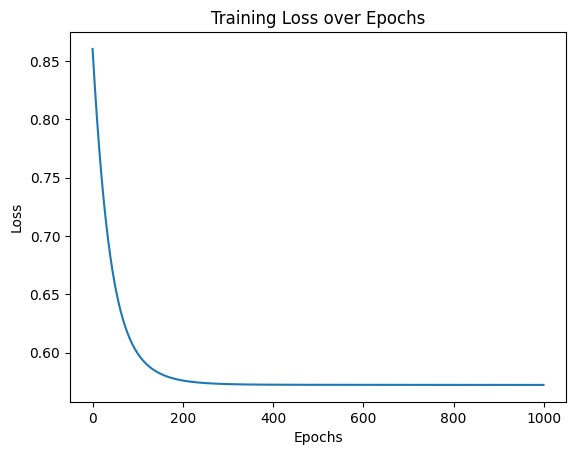

Training Accuracy: 74.11%
AUC-ROC Score: 0.5099
AUC-ROC Score: 0.5099


In [12]:
# create Nueral Network class
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights with small random values
        self.learning_rate = learning_rate
        # Weights from input to hidden layer
        self.W1 = [[random.uniform(-0.5, 0.5) for _ in range(hidden_size)] for _ in range(input_size + 1)]  # +1 for bias

        # Weights from hidden to output layer
        self.W2 = [[random.uniform(-0.5, 0.5) for _ in range(output_size)] for _ in range(hidden_size + 1)]  # +1 for bias

    def forward(self, X):
        """Perform forward propagation."""
        self.A1 = add_bias(X)  # Add bias to input layer

        # from input to hidden layer -> multiply input with weights. (Num Samples * (Features + 1)) * ((Features + 1) * Hidden Neurons) = (Num Samples * Hidden Neurons)
        self.Z2 = matrix_multiply(self.A1, self.W1)

        # Input layer vector converted to hidden layer activations using sigmoid. (Num Samples * Hidden Neurons) matrix but has the probabilities
        self.A2 = [[sigmoid(z) for z in row] for row in self.Z2]

        self.A2 = add_bias(self.A2)  # Add bias to hidden layer. (Num Samples * (Hidden Neurons + 1))

        # from hidden to output layer -> multiply hidden layer with weights. (Num Samples * (Hidden Neurons + 1)) * ((Hidden Neurons + 1) * Output Neurons) = (Num Samples * Output Neurons)
        self.Z3 = matrix_multiply(self.A2, self.W2)

        # Hidden layer vector converted to output layer activations using sigmoid. (Num Samples * Output Neurons) matrix but has the probabilities
        self.A3 = [[sigmoid(z) for z in row] for row in self.Z3]
        return self.A3

    def backward(self, X, y):
        """Perform backward propagation and update weights."""

        m = len(y)
        # Output layer target values as matrix. Num Samples * Output Neurons
        y_matrix = [[val] for val in y]  

        # Calculate output layer error. Self.A3 is the predicted output from forward pass. y_matrix is the actual output
        # sigmoid_derivative is used to compute the gradient
        # ((Num Samples * Output Neurons) - (Num Samples * Output Neurons)) * (Num Samples * Output Neurons) = (Num Samples * Output Neurons)
        output_errors = [[(self.A3[i][0] - y_matrix[i][0]) * sigmoid_derivative(self.A3[i][0])] for i in range(m)]

        # Calculate hidden layer error by multiplying errors with transposed weights. Exclude bias weight of W2 when backpropagating
        # This yields a (m x hidden_neurons) matrix
        hidden_errors = matrix_multiply(output_errors, transpose(self.W2[1:]))  # Exclude bias weight

        # Apply sigmoid derivative to hidden layer errors element-wise and keep shape (m x hidden_neurons).
        # Note: self.A2 includes a bias column at index 0, so hidden activations for neuron j are at self.A2[i][j+1].
        hidden_errors = [[hidden_errors[i][j] * sigmoid_derivative(self.A2[i][j+1]) for j in range(len(hidden_errors[0]))] for i in range(m)]

        # Update weights
       
        A2_T = transpose(self.A2)  # convert them to (Hidden Neurons + 1) * Num Samples matrix
        A1_T = transpose(self.A1)  # convert them to (Features + 1) * Num Samples matrix

        # Compute gradients
        # For Output layer: (Hidden Neurons + 1) * Num Samples) * (Num Samples * Output Neurons) = ((Hidden Neurons + 1) * Output Neurons)
        W2_gradients = matrix_multiply(A2_T, output_errors)

        # For Hidden layer: (Features + 1) * Num Samples) * (Num Samples * (Hidden Neurons + 1)) = ((Features + 1) * (Hidden Neurons + 1))
        W1_gradients = matrix_multiply(A1_T, hidden_errors)

        # Gradient descent step
        # Update weights by subtracting the gradients scaled by learning rate and averaged over all samples
        self.W2 = [[self.W2[i][j] - self.learning_rate * W2_gradients[i][j] / m for j in range(len(self.W2[0]))] for i in range(len(self.W2))]

        self.W1 = [[self.W1[i][j] - self.learning_rate * W1_gradients[i][j] / m for j in range(len(self.W1[0]))] for i in range(len(self.W1))]  

        # We don't have return statement as weights are updated in place!

    # Compute the binary cross-entropy loss
    def compute_loss(self, y, y_pred):
        m = len(y)
        loss = 0
        for i in range(m):
            # Avoid log(0) by adding a small constant
            loss += - (y[i] * math.log(y_pred[i][0] + 1e-15) + (1 - y[i]) * math.log(1 - y_pred[i][0] + 1e-15))
        return loss / m


    # Train the neural network
    def train_batch(self, X, y, epochs=1000):
        """ Batch Gradient Descent Training: Update all weights after processing the entire dataset."""
        loss_history = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y)     # weights are updated at this step
            loss = self.compute_loss(y, y_pred)
            loss_history.append(loss)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
        return loss_history


    # Predict class labels
    def predict(self, X):
        """Predict class labels for given input data X."""
        y_pred = self.forward(X)
        return y_pred

        
if __name__ == "__main__":
    # Convert DataFrame to list of lists for processing
    X_list = X.values.tolist()
    y_list = y.values.tolist()

    # Initialize neural network
    input_size = len(X.columns)  # Number of features
    hidden_size = 5               # Number of hidden neurons (hyperparameter)
    output_size = 1               # Binary classification
    learning_rate = 0.1           # Learning rate (hyperparameter)

    nn = SimpleNN(input_size, hidden_size, output_size, learning_rate)

    # Train with different GD variants
    print("Training with Batch GD:")

    # Train the neural network using batch gradient descent
    epochs = 1000
    loss_history = nn.train_batch(X_list, y_list, epochs)

    # Plot the loss over epochs
    plt.plot(loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    # Make predictions on the training set
    y_pred = nn.predict(X_list)
    y_pred_classes = [1 if pred[0] >= 0.5 else 0 for pred in y_pred]

    # Calculate accuracy
    accuracy = sum(1 for true, pred in zip(y_list, y_pred_classes) if true == pred) / len(y_list)
    print(f'Training Accuracy: {accuracy * 100:.2f}%')

    # calculate auc-roc score
    from sklearn.metrics import roc_auc_score
    auc_roc = roc_auc_score(y_list, [pred[0] for pred in y_pred])
    print(f'AUC-ROC Score: {auc_roc:.4f}')


In [13]:
# Small NumPy-based test and demo (vectorized) - lightweight unit check
import numpy as np

# Create a tiny synthetic dataset
X_test = np.array([[0.1, 0.2, 0.3],
                   [0.4, 0.5, 0.6]])
y_test = np.array([0, 1])

# Simple shapes check for the list-based SimpleNN
X_list = X_test.tolist()
y_list = y_test.tolist()

# Initialize a small network with input_size=3 features
nn_small = SimpleNN(input_size=3, hidden_size=4, output_size=1, learning_rate=0.5)

# Run forward and backward one step to ensure no index errors and reasonable shapes
y_pred_before = nn_small.forward(X_list)
print('y_pred_before shape (samples x outputs):', len(y_pred_before), len(y_pred_before[0]))

# Perform a single backward/update step
nn_small.backward(X_list, y_list)

# Forward again
y_pred_after = nn_small.forward(X_list)
print('y_pred_after shape (samples x outputs):', len(y_pred_after), len(y_pred_after[0]))

# Quick sanity: check loss decreased (may not strictly decrease after one step, but it shouldn't crash)
loss_before = nn_small.compute_loss(y_list, y_pred_before)
loss_after = nn_small.compute_loss(y_list, y_pred_after)
print(f'Loss before: {loss_before:.6f}, Loss after: {loss_after:.6f}')


y_pred_before shape (samples x outputs): 2 1
y_pred_after shape (samples x outputs): 2 1
Loss before: 0.719376, Loss after: 0.716724


## Logistic Regression from scratch (vectorized, NumPy)

This section implements a logistic regression binary classifier trained with gradient descent using NumPy vectorized operations (no scikit-learn or statsmodels). The implementation includes:

- a small, well-documented `LogisticRegressionGD` class
- numerically stable sigmoid and log-loss calculations
- a simple demo that trains on a synthetic, linearly separable dataset and reports loss and accuracy

Use the demo cell to run the training and visualize results.

In [ ]:
import numpy as np

class LogisticRegressionGD:
    """Logistic Regression using batch Gradient Descent (vectorized, NumPy).

    Simple, readable implementation suitable for teaching and small datasets.

    Parameters
    ----------
    lr : float
        Learning rate (step size).
    epochs : int
        Number of gradient descent steps.
    fit_intercept : bool
        If True, add an intercept term.
    verbose : int
        Print progress every `verbose` epochs if > 0.
    """

    def __init__(self, lr=0.1, epochs=1000, fit_intercept=True, verbose=0):
        self.lr = lr
        self.epochs = epochs
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.coef_ = None  # weights (including intercept if fit_intercept=True)
        self.loss_history_ = []

    def _add_intercept(self, X):
        if not self.fit_intercept:
            return X
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))

    @staticmethod
    def _sigmoid(z):
        # numerically stable sigmoid
        z = np.clip(z, -500, 500)
        return 1.0 / (1.0 + np.exp(-z))

    @staticmethod
    def _log_loss(y, p):
        # binary cross-entropy (averaged)
        eps = 1e-15
        p = np.clip(p, eps, 1 - eps)
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

    def fit(self, X, y, X_val=None, y_val=None):
        """Fit model using batch gradient descent.

        X : array-like, shape (n_samples, n_features)
        y : array-like, shape (n_samples,) with binary labels {0,1}
        X_val, y_val : optional validation set to track val loss
        """
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float).reshape(-1, 1)

        X = self._add_intercept(X)
        n_samples, n_features = X.shape

        # initialize weights to zeros
        self.coef_ = np.zeros((n_features, 1), dtype=float)

        self.loss_history_ = []
        val_loss_history = []

        for epoch in range(1, self.epochs + 1):
            # linear combination
            z = X.dot(self.coef_)
            # predictions
            p = self._sigmoid(z)

            # gradient: X^T (p - y) / n
            grad = X.T.dot(p - y) / n_samples

            # update
            self.coef_ -= self.lr * grad

            # loss tracking
            loss = self._log_loss(y, p)
            self.loss_history_.append(loss)

            if X_val is not None and y_val is not None:
                p_val = self._sigmoid(self._add_intercept(np.asarray(X_val)).dot(self.coef_))
                val_loss_history.append(self._log_loss(np.asarray(y_val).reshape(-1,1), p_val))

            if self.verbose and (epoch % self.verbose == 0 or epoch == 1 or epoch == self.epochs):
                msg = f"Epoch {epoch}/{self.epochs} - loss: {loss:.6f}"
                if val_loss_history:
                    msg += f" - val_loss: {val_loss_history[-1]:.6f}"
                print(msg)

        return self

    def predict_proba(self, X):
        X = np.asarray(X, dtype=float)
        X = self._add_intercept(X)
        z = X.dot(self.coef_)
        p = self._sigmoid(z)
        return p.ravel()

    def predict(self, X, threshold=0.5):
        p = self.predict_proba(X)
        return (p >= threshold).astype(int)

    def score(self, X, y):
        y = np.asarray(y)
        preds = self.predict(X)
        return np.mean(preds == y)


In [ ]:
# Run logistic regression on the preprocessed DataFrame `X` and target `y`
import numpy as np
import matplotlib.pyplot as plt

# Convert DataFrame/Series to lists (for legacy code) and to NumPy arrays (for training)
X_list = X.values.tolist()
y_list = y.values.tolist()

X_np = np.asarray(X_list, dtype=float)
y_np = np.asarray(y_list, dtype=float).ravel()

# Quick train/validation split (stratified if labels are imbalanced)
try:
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X_np, y_np, test_size=0.2, random_state=42, stratify=y_np)
except Exception:
    # If sklearn not available or stratify fails (e.g., single class), fall back to simple split
    n = X_np.shape[0]
    split = int(0.8 * n)
    X_train, X_val = X_np[:split], X_np[split:]
    y_train, y_val = y_np[:split], y_np[split:]

print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")

# Initialize and train the model
model = LogisticRegressionGD(lr=0.1, epochs=1000, fit_intercept=True, verbose=200)
model.fit(X_train, y_train, X_val=X_val, y_val=y_val)

# Evaluate
train_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)
print(f"Train accuracy: {train_acc*100:.2f}% | Val accuracy: {val_acc*100:.2f}%")

# Try ROC-AUC if sklearn available
try:
    from sklearn.metrics import roc_auc_score
    y_val_proba = model.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_val_proba)
    print(f"Validation ROC-AUC: {auc:.4f}")
except Exception as e:
    print('ROC-AUC not computed:', e)

# Plot training loss
plt.figure(figsize=(8,4))
plt.plot(model.loss_history_, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Note: decision-boundary plot omitted because this dataset may have >2 features
# If you want a 2D projection, perform PCA or select two features and re-run predict_proba on a grid.